In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/EDA Projects CSV Files/Uber Dataset Analysis/My Uber Drives - 2016.csv')
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


# Check the missing values

In [3]:
df.isnull().sum()

,0
START_DATE*,0
END_DATE*,1
CATEGORY*,1
START*,1
STOP*,1
MILES*,0
PURPOSE*,503


# Drop rows with missing values in 'START_DATE*' and 'END_DATE*'

In [4]:
df.dropna(subset=['START_DATE*', 'END_DATE*'], inplace=True)

# Fill missing values in 'PURPOSE*' with 'Other'

In [5]:
df['PURPOSE*'].fillna('Other', inplace=True)

# Convert 'START_DATE*' and 'END_DATE*' to datetime objects

In [6]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'])
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'])

# Removing Unnecessary Columns

In [7]:
unwanted_cols = ['CATEGORY*', 'START*', 'STOP*']
df = df.drop(columns=unwanted_cols, errors='ignore')

# Calculate trip duration

In [8]:
df['TRIP_DURATION'] = (df['END_DATE*'] - df['START_DATE*']).dt.total_seconds() / 60


#Extract date and time feature

In [9]:
df['START_DAY'] = df['START_DATE*'].dt.day_name()
df['START_MONTH'] = df['START_DATE*'].dt.month_name()
df['START_HOUR'] = df['START_DATE*'].dt.hour

In [10]:
df.head()

,START_DATE*,END_DATE*,MILES*,PURPOSE*,TRIP_DURATION,START_DAY,START_MONTH,START_HOUR
0,2016-01-01 21:11:00,2016-01-01 21:17:00,5.1,Meal/Entertain,6.0,Friday,January,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,5.0,Other,12.0,Saturday,January,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,4.8,Errand/Supplies,13.0,Saturday,January,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,4.7,Meeting,14.0,Tuesday,January,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,63.7,Customer Visit,67.0,Wednesday,January,14


# Q.1 What is the distribution of trip durations?

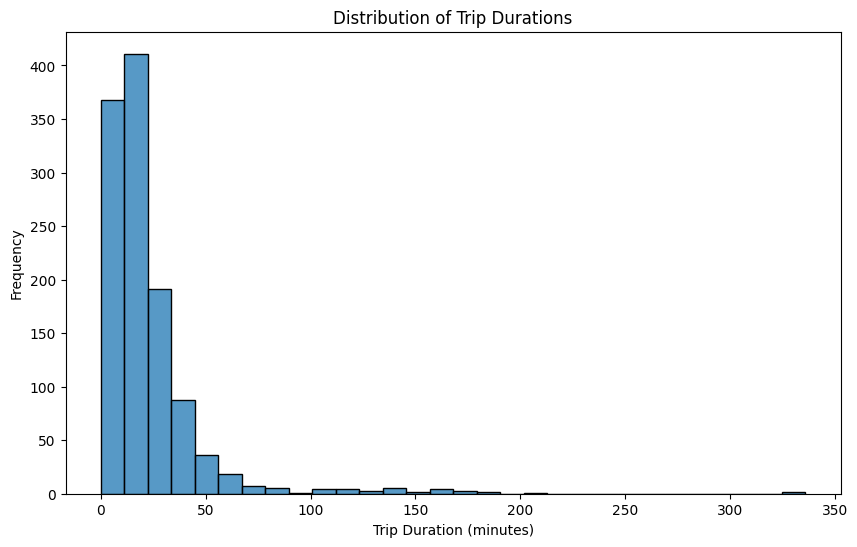

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TRIP_DURATION'], bins=30)
plt.title('Distribution of Trip Durations')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# Q.2 What is the average trip duration for each hour of the day?

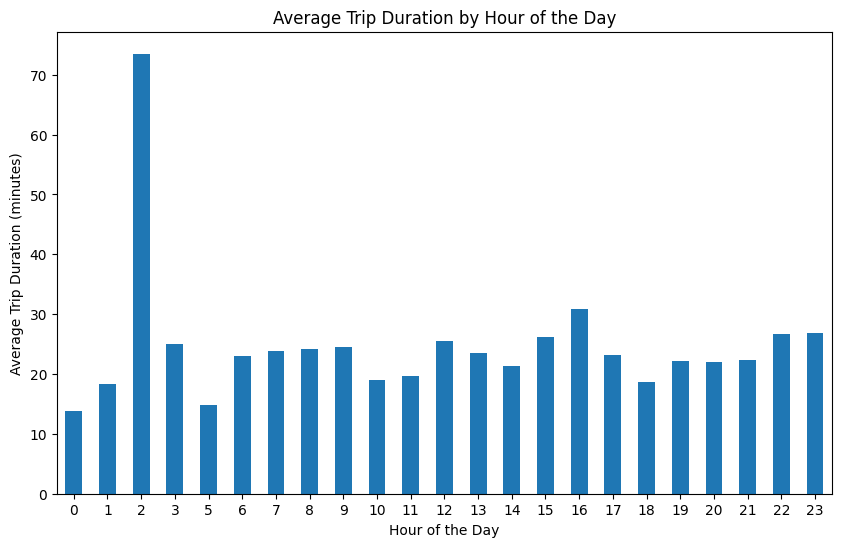

In [12]:
avg_duration_by_hour = df.groupby('START_HOUR')['TRIP_DURATION'].mean()
plt.figure(figsize=(10, 6))
avg_duration_by_hour.plot(kind='bar')
plt.title('Average Trip Duration by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Duration (minutes)')
plt.xticks(rotation=0)
plt.show()

#Q.3 How does the number of trips vary by hour of the day?

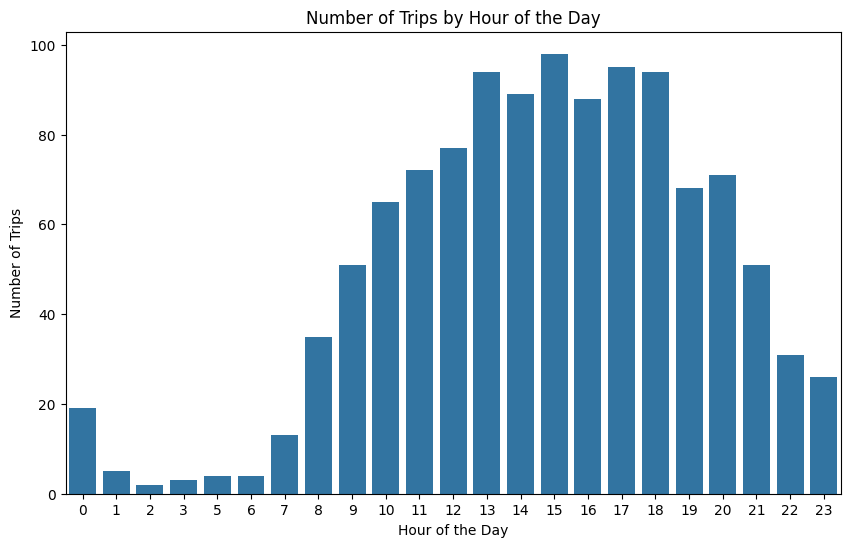

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='START_HOUR', data=df)
plt.title('Number of Trips by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

#Q.4 What is the distribution of trip purposes?



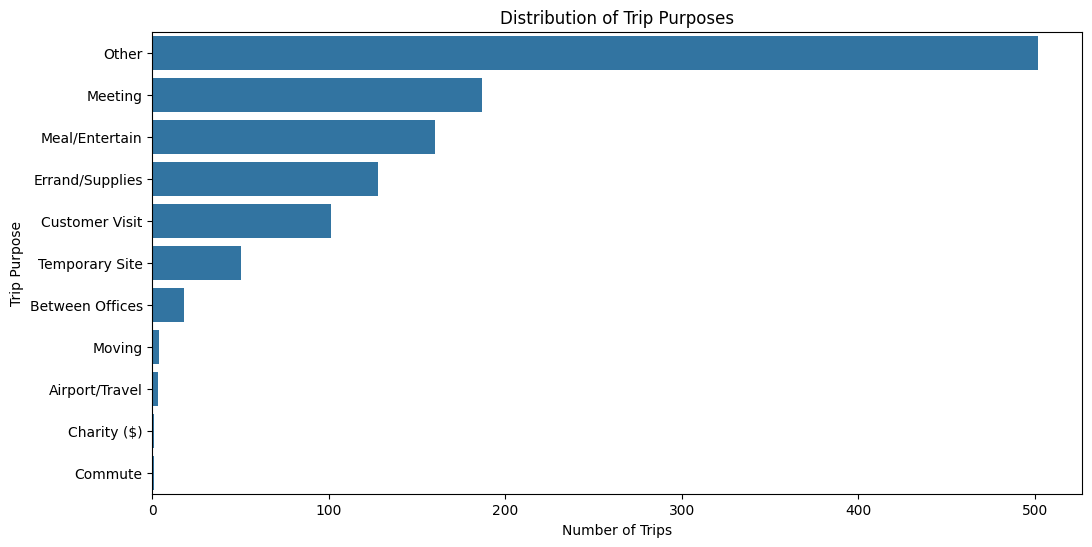

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df['PURPOSE*'], order=df['PURPOSE*'].value_counts().index)
plt.title('Distribution of Trip Purposes')
plt.xlabel('Number of Trips')
plt.ylabel('Trip Purpose')
plt.show()

# Q.5 What is the relationship between miles driven and trip duration?

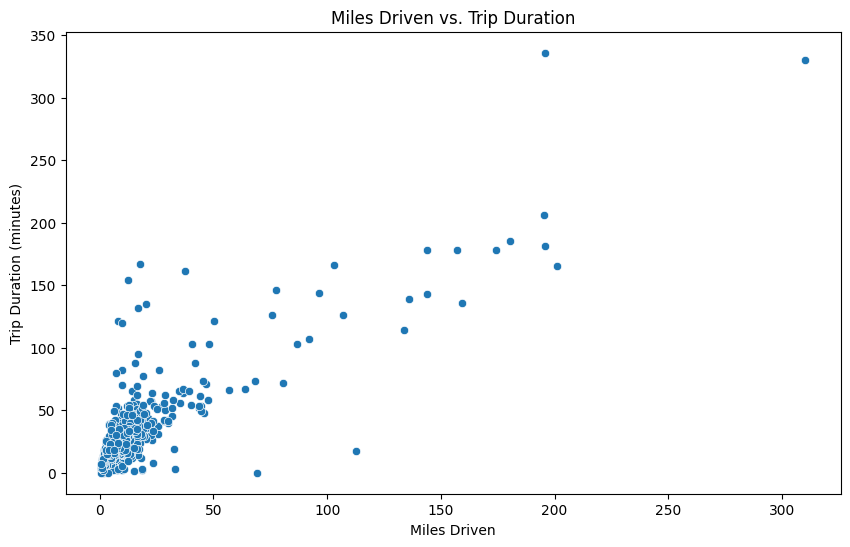

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MILES*', y='TRIP_DURATION', data=df)
plt.title('Miles Driven vs. Trip Duration')
plt.xlabel('Miles Driven')
plt.ylabel('Trip Duration (minutes)')
plt.show()

#Q.6 What is the distribution of trip distances?


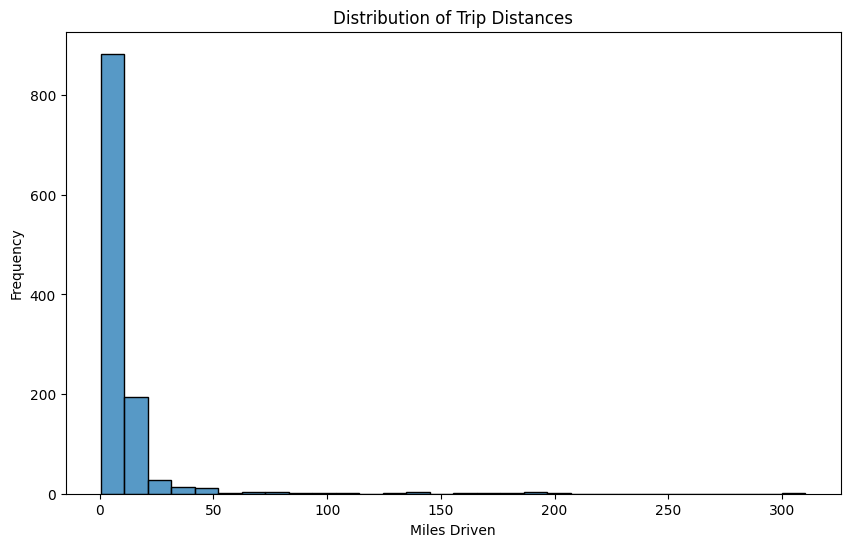

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['MILES*'], bins=30)
plt.title('Distribution of Trip Distances')
plt.xlabel('Miles Driven')
plt.ylabel('Frequency')
plt.show()

Conclusion -

The Uber dataset reveals that the service is primarily used for short-distance trips, mainly for business purposes. This is evident from the distribution of trip durations and distances, which are heavily skewed towards shorter trips. Most rides are under 20 minutes and cover less than 10 miles. The peak usage times align with typical commuting hours, further emphasizing its role in work-related travel.

While trips for personal use and other reasons exist, they are less common compared to business-related trips. The data suggests that within the timeframe and location covered by this dataset, Uber serves as a significant transportation option for professionals and businesses.

Additionally, there's a noticeable impact of time and traffic on trip durations. Trips during early morning hours tend to have longer durations potentially due to reduced traffic, while peak hours might lead to slightly shorter but potentially more frequent trips.